CIFAR-10 Image Classification Using MLP (Multi-Layer Perceptron) in TensorFlow

This code demonstrates how to build, train, and evaluate a fully connected neural network (MLP) for image classification on the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes.

Key Features:


Input images are flattened and passed through 3 dense layers with ReLU activation.

Dropout is applied after each layer to reduce overfitting.

L2 regularization improves generalization.

Adam optimizer is used with a low learning rate for stable training.

EarlyStopping, ModelCheckpoint, and ReduceLROnPlateau are used for better training control.


The training and validation accuracy/loss curves are plotted to visualize model performance.


Although CNNs perform better on image data, this example shows how even an MLP can handle image classification with proper regularization and training techniques.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1349 - loss: 3.5581 - val_accuracy: 0.2659 - val_loss: 2.9597 - learning_rate: 1.0000e-04
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2217 - loss: 2.9294 - val_accuracy: 0.3142 - val_loss: 2.5786 - learning_rate: 1.0000e-04
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2594 - loss: 2.6097 - val_accuracy: 0.3231 - val_loss: 2.3494 - learning_rate: 1.0000e-04
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2774 - loss: 2.3947 - val_accuracy: 0.3589 - val_loss: 2.1632 - learning_rate: 1.0000e-04
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2916 - loss: 2.2491 - val_accuracy: 0.3679 - val_loss: 2.0483 - learning_rate: 1.0000e-04
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3096 - loss: 2.1489 - val_accuracy: 0.3701 - val_loss: 1.9814 - learning_rate: 1.0000e-04
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy:

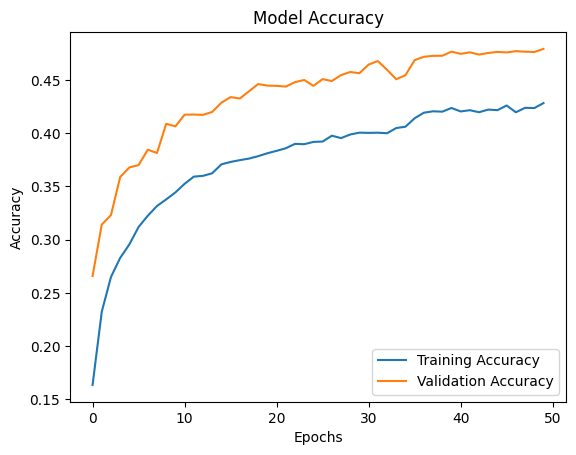

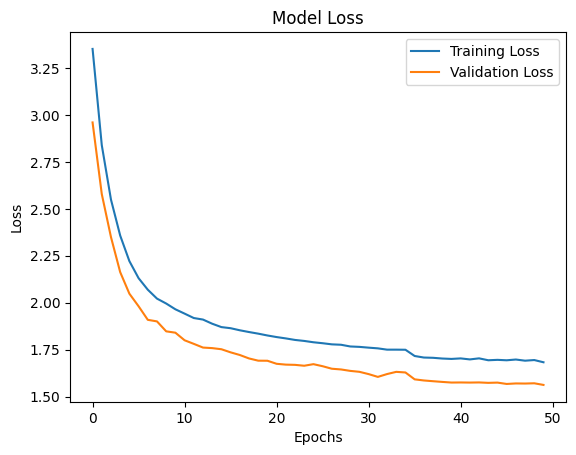

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define MLP model architecture
def create_mlp_model(optimizer='adam', dropout_rate=0.5, regularizer=None):
    model = models.Sequential()

    # Flatten the input image (32x32x3) to a 1D vector (3072)
    model.add(layers.Flatten(input_shape=(32, 32, 3)))

    # First dense layer
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dropout(dropout_rate))

    # Second dense layer
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dropout(dropout_rate))

    # Third dense layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dropout(dropout_rate))

    # Output layer with softmax activation for classification
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_mlp_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Choose regularization and optimizer
regularizer = regularizers.l2(0.001)
optimizer = Adam(learning_rate=0.0001)

# Create and train the model
model = create_mlp_model(optimizer=optimizer, dropout_rate=0.5, regularizer=regularizer)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Visualize the training process
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Handwritten Digit Recognition Using CNN on MNIST (TensorFlow/Keras)

This code builds a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset, consisting of 70,000 grayscale images (28x28 pixels) across 10 classes (digits 0–9).

Key Highlights:

Uses Conv2D, MaxPooling, and BatchNormalization for efficient feature extraction.

Dropout layers and L2 regularization help prevent overfitting.

Adam optimizer is used for stable and fast convergence.

EarlyStopping and ModelCheckpoint callbacks ensure optimal model performance.

Plots training and validation accuracy/loss for performance visualization.

Even with just 5 epochs, the model reaches impressive accuracy. More epochs can further improve performance!

CNNs are well-suited for image tasks, and this implementation shows how they can effectively learn spatial hierarchies in digit data.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8768 - loss: 1.6391 - val_accuracy: 0.9726 - val_loss: 0.5510
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9597 - loss: 0.5219 - val_accuracy: 0.9768 - val_loss: 0.4311
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9643 - loss: 0.4601 - val_accuracy: 0.9798 - val_loss: 0.3968
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9683 - loss: 0.4122 - val_accuracy: 0.9799 - val_loss: 0.3905
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9698 - loss: 0.4110 - val_accuracy: 0.9777 - val_loss: 0.3663
313/313 - 1s - 4ms/step - accuracy: 0.9777 - loss: 0.3663
Test accuracy: 0.9777


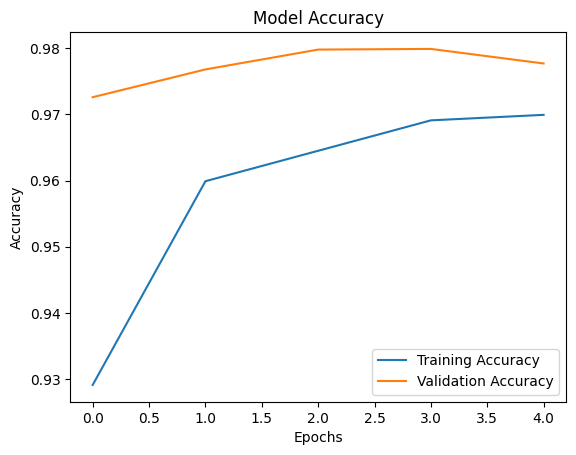

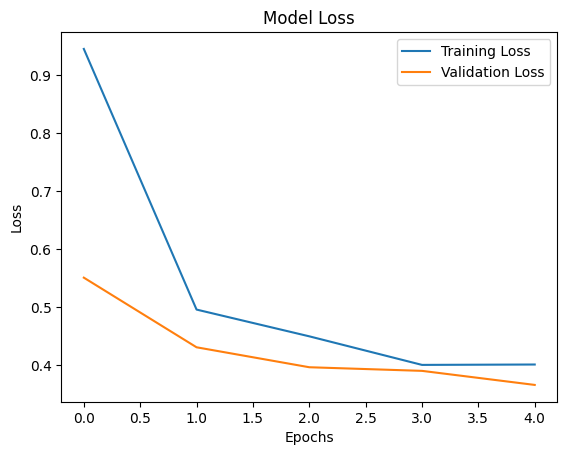

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model
def create_model(optimizer='adam', regularizer=None, dropout_rate=0.5):
    model = models.Sequential()

    # First Conv layer with activation and BatchNormalization
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())

    # Second Conv layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout_rate))

    # Flatten before dense layers
    model.add(Flatten())

    # Dense layer with L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Choose regularizer and optimizer
regularizer = regularizers.l2(0.01)
optimizer = Adam()

# Create the model
model = create_model(optimizer=optimizer, regularizer=regularizer, dropout_rate=0.3)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,  # You can increase this to 20+ for better accuracy
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
